In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googtrendsdataviz/TESLA Search Trend vs Price.csv
/kaggle/input/googtrendsdataviz/Bitcoin Search Trend.csv
/kaggle/input/googtrendsdataviz/Daily Bitcoin Price.csv
/kaggle/input/googtrendsdataviz/UE Benefits Search vs UE Rate 2004-20.csv
/kaggle/input/googtrendsdataviz/UE Benefits Search vs UE Rate 2004-19.csv


## Creating DataFrames from csv files

In [54]:
tesla_df = pd.read_csv("/kaggle/input/googtrendsdataviz/TESLA Search Trend vs Price.csv")
bitcoin_search_df = pd.read_csv("/kaggle/input/googtrendsdataviz/Bitcoin Search Trend.csv")
bitcoin_price_df = pd.read_csv("/kaggle/input/googtrendsdataviz/Daily Bitcoin Price.csv")
unemp_20_df = pd.read_csv("/kaggle/input/googtrendsdataviz/UE Benefits Search vs UE Rate 2004-20.csv")
unemp_19_df = pd.read_csv("/kaggle/input/googtrendsdataviz/UE Benefits Search vs UE Rate 2004-19.csv")

## Here are the Google Trends Search Parameters used to generate the .csv data:
(Part of AY's 100 Days of coding bootcamp)

"Tesla", Worldwide, Web Search

"Bitcoin", Worldwide, News Search

"Unemployment Benefits", United States, Web Search

In [55]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


### Some questions to answer
What are the shapes of the DataFrames?

How many rows & columns do they have?

What are the column names?

What is the largest number in the search data column? Try using the .describe() function.

What is the periodicity of the time series data (daily, weekly, monthly)?

In [56]:
tesla_df.shape

(124, 3)

In [5]:
tesla_df.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [6]:
print(f"Largest value in Tesla web search: {tesla_df.max()}")

Largest value in Tesla web search: MONTH              2020-09-01
TSLA_WEB_SEARCH            31
TSLA_USD_CLOSE     498.320007
dtype: object


In [7]:
unemp_20_df.shape

(200, 3)

In [8]:
unemp_20_df.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [9]:
bitcoin_search_df.shape

(73, 2)

In [10]:
bitcoin_search_df.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [11]:
bitcoin_search_df.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


#### To find largest number in search data column

In [12]:
bitcoin_search_df.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [13]:
bitcoin_price_df.shape

(2204, 3)

In [14]:
bitcoin_price_df.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

#### Data cleaning and finding missing values

In [15]:
tesla_df.isna().any()

MONTH              False
TSLA_WEB_SEARCH    False
TSLA_USD_CLOSE     False
dtype: bool

In [16]:
bitcoin_search_df.isna().any(axis=1)

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Length: 73, dtype: bool

#### Finding the row with the NaN values

In [57]:
bitcoin_price_df[bitcoin_price_df.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [58]:
bitcoin_price_df.dropna(inplace=True)

#### Finding the data type for the Month and Date columns

In [59]:
tesla_df.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [20]:
bitcoin_search_df.dtypes

MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

In [21]:
bitcoin_price_df.dtypes

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

In [22]:
unemp_20_df.dtypes

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

In [60]:
tesla_df.MONTH = pd.to_datetime(tesla_df.MONTH)

In [61]:
tesla_df.dtypes

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

In [62]:
bitcoin_search_df.MONTH = pd.to_datetime(bitcoin_search_df.MONTH)

In [26]:
bitcoin_search_df.dtypes

MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

In [63]:
bitcoin_price_df.DATE = pd.to_datetime(bitcoin_price_df.DATE)

In [64]:
bitcoin_price_df.dtypes

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

In [65]:
unemp_20_df.MONTH = pd.to_datetime(unemp_20_df.MONTH)

In [30]:
unemp_20_df.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

In [66]:
type(tesla_df.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [33]:
bitcoin_price_df.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [34]:
bitcoin_search_df.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


#### Use resampling() on bitcoin_price_df to make the Date consistent with bitcoin_search_df that has Date in months

In [67]:
btc_price_monthly_df = bitcoin_price_df.resample('M', on="DATE").last()

In [36]:
btc_price_monthly_df.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [37]:
bitcoin_search_df.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [38]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


#### Visualizing the TESLA Data (Web Search Vs USD Close value)

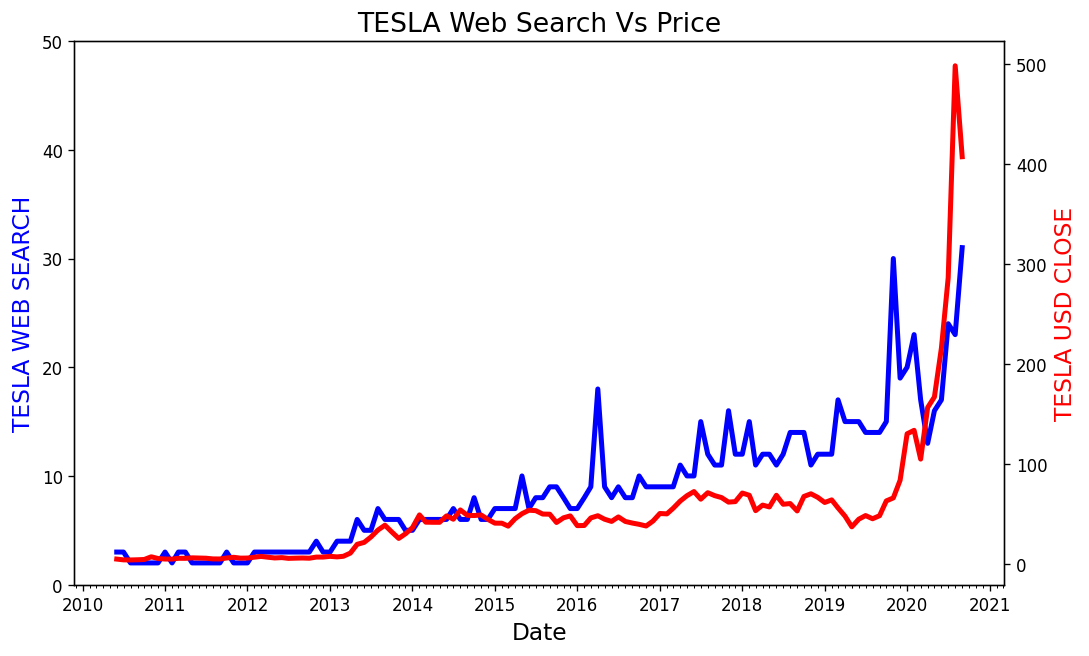

In [69]:
plt.figure(figsize=(10,6), dpi=120)
plt.title("TESLA Web Search Vs Price", fontsize=16)
ax1 = plt.gca() #get current axis
ax2 = plt.twinx() # copy the axis that shares the same x axis
ax1.plot(tesla_df.MONTH, tesla_df.TSLA_WEB_SEARCH, color='blue', linewidth=3)
ax2.plot(tesla_df.MONTH, tesla_df.TSLA_USD_CLOSE, color='red', linewidth=3)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('TESLA WEB SEARCH', color='blue', fontsize=14)
ax2.set_ylabel('TESLA USD CLOSE', color='red', fontsize=14)
ax1.set_ylim([0,50])
#ax1.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])
plt.xticks(fontsize=14, rotation=45)
# format the ticks
# Create locators for ticks on the x axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
date_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

### Visualizing the Bitcoin Data

In [40]:
bitcoin_search_df.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [52]:
btc_price_monthly_df.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

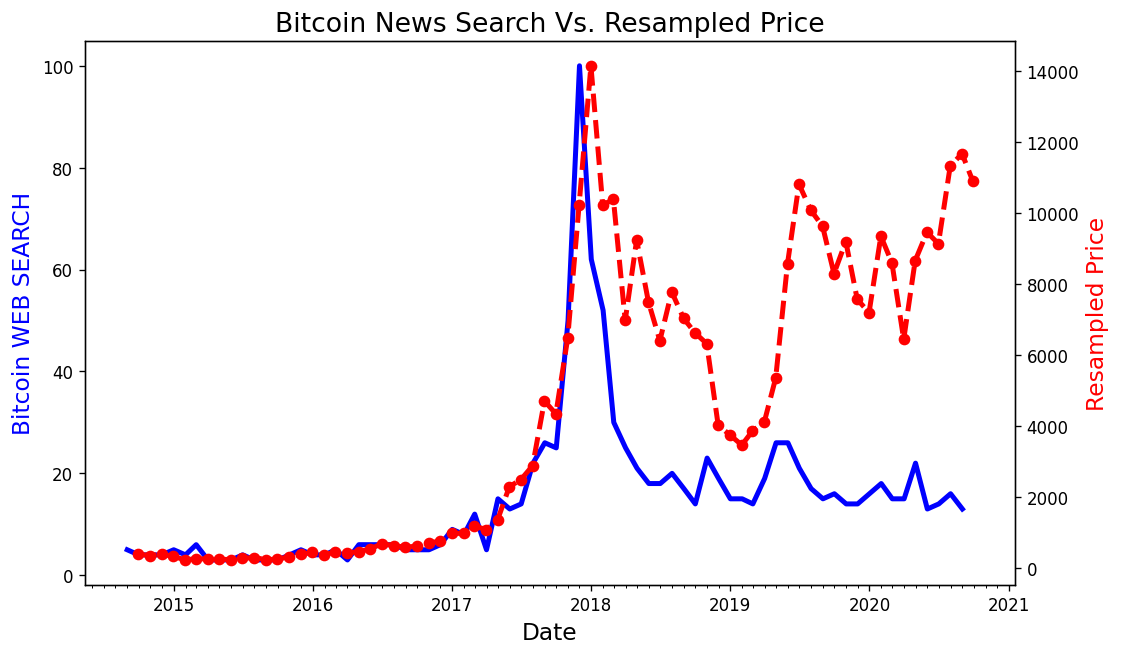

In [71]:
plt.figure(figsize=(10,6), dpi=120)
plt.title("Bitcoin News Search Vs. Resampled Price", fontsize=16)
ax1 = plt.gca() #get current axis
ax2 = plt.twinx() # copy the axis that shares the same x axis
ax1.plot(bitcoin_search_df.MONTH, bitcoin_search_df.BTC_NEWS_SEARCH, color='blue', linewidth=3)
ax2.plot(btc_price_monthly_df.DATE, btc_price_monthly_df.CLOSE, color='red', linewidth=3, linestyle='dashed', marker='o')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Bitcoin WEB SEARCH', color='blue', fontsize=14)
ax2.set_ylabel('Resampled Price', color='red', fontsize=14)
#ax1.set_ylim([0,50])
#ax1.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])
plt.xticks(fontsize=14, rotation=45)
# format the ticks
# Create locators for ticks on the x axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
date_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

#### Visualizing the Unemployment data

In [43]:
unemp_20_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


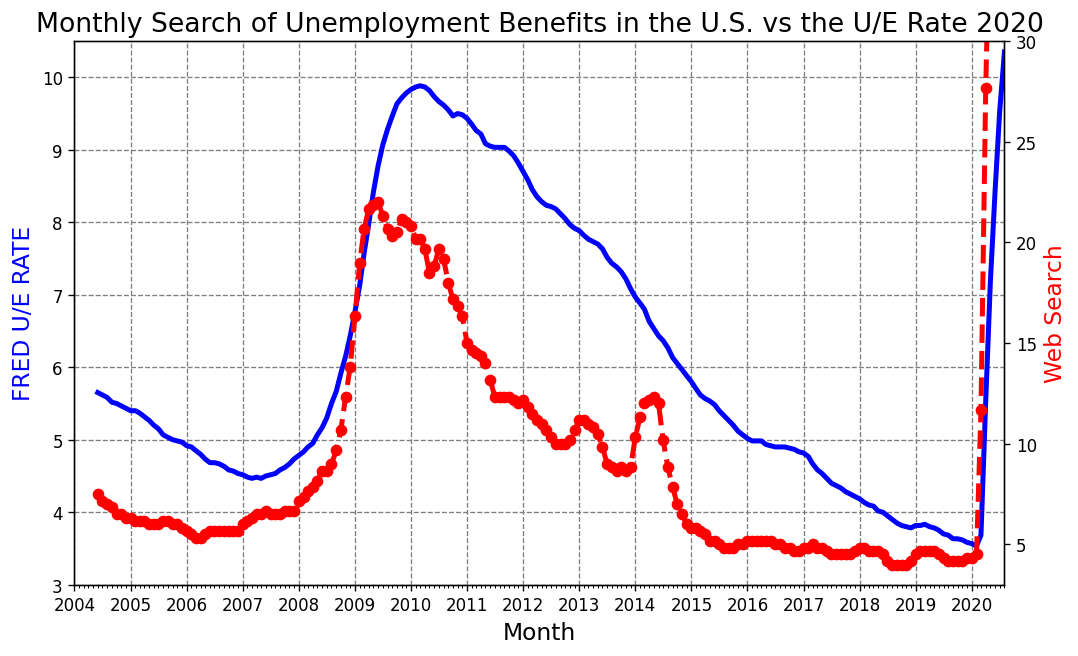

In [72]:
roll_df = unemp_20_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
plt.figure(figsize=(10,6), dpi=120)
plt.title("Monthly Search of Unemployment Benefits in the U.S. vs the U/E Rate 2020", fontsize=16)
ax1 = plt.gca() #get current axis
ax2 = plt.twinx() # copy the axis that shares the same x axis
ax1.plot(unemp_20_df.MONTH, roll_df.UNRATE, color='blue', linewidth=3)
ax2.plot(unemp_20_df.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='red', linewidth=3, linestyle='dashed', marker='o')
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('FRED U/E RATE', color='blue', fontsize=14)
ax2.set_ylabel('Web Search', color='red', fontsize=14)
ax1.grid(color='grey', linestyle='dashed')
ax1.set_ylim(bottom=3, top=10.5)
ax2.set_ylim(bottom=3, top=30)
ax1.set_xlim([unemp_20_df.MONTH.min(), unemp_20_df.MONTH.max()])
#ax2.set_ylim([0,50])
#ax2.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])
plt.xticks(fontsize=14, rotation=45)
# format the ticks
# Create locators for ticks on the x axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
date_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

In [45]:
roll_df.head()

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [46]:
unemp_19_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


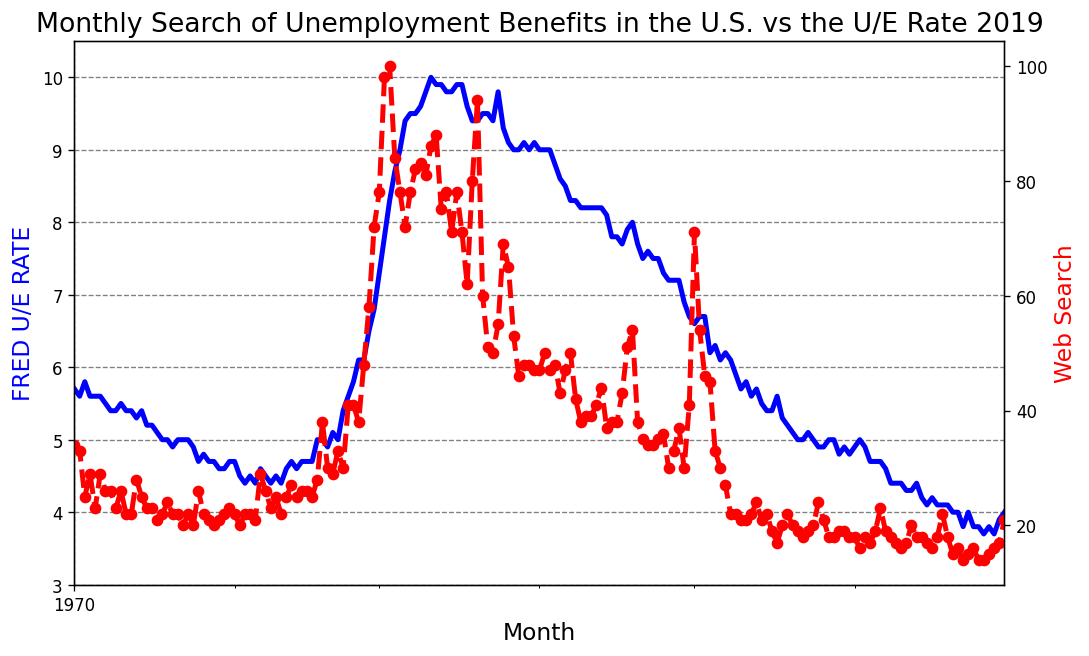

In [73]:
plt.figure(figsize=(10,6), dpi=120)
plt.title("Monthly Search of Unemployment Benefits in the U.S. vs the U/E Rate 2019", fontsize=16)
ax1 = plt.gca() #get current axis
ax2 = plt.twinx() # copy the axis that shares the same x axis
ax1.plot(unemp_19_df.MONTH, unemp_19_df.UNRATE, color='blue', linewidth=3)
ax2.plot(unemp_19_df.MONTH, unemp_19_df.UE_BENEFITS_WEB_SEARCH, color='red', linewidth=3, linestyle='dashed', marker='o')
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('FRED U/E RATE', color='blue', fontsize=14)
ax2.set_ylabel('Web Search', color='red', fontsize=14)
ax1.grid(color='grey', linestyle='dashed')
ax1.set_ylim(bottom=3, top=10.5)
#ax2.set_ylim(bottom=3, top=30)
ax1.set_xlim([unemp_19_df.MONTH.min(), unemp_19_df.MONTH.max()])
#ax2.set_ylim([0,50])
#ax2.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])
plt.xticks(fontsize=14, rotation=45)
# format the ticks
# Create locators for ticks on the x axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
date_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

As can be seen from plot above, the web search for benefits preceeds the spike in unemployment. The FRED U?E Rate lags behind the web search.

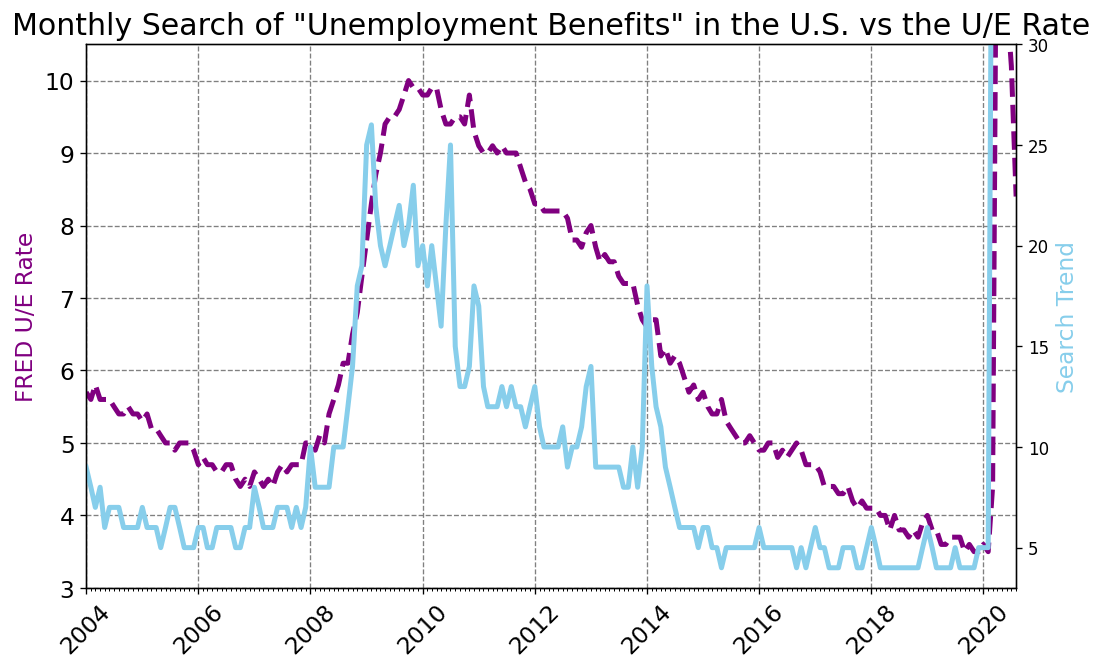

In [74]:
#From AY's Code
plt.figure(figsize=(10,6), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# format the ticks
# Create locators for ticks on the x axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=3, top=10.5)
ax2.set_ylim(bottom=3, top=30)
ax1.set_xlim([unemp_20_df.MONTH.min(), unemp_20_df.MONTH.max()])
 
# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')
 
# Change the dataset used
ax1.plot(unemp_20_df.MONTH, unemp_20_df.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(unemp_20_df.MONTH, unemp_20_df.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)
 
plt.show()